In [1346]:
#importamos librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [1347]:
#cargar archivo csv
df=pd.read_csv('Victoria_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,Desconocido,-%,f,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,within an hour,100%,t,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,Desconocido,-%,f,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,a few days or more,10%,f,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,within a few hours,75%,f,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01


In [1348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3967 non-null   object 
 1   name                                          3967 non-null   object 
 2   description                                   3967 non-null   object 
 3   neighborhood_overview                         3967 non-null   object 
 4   picture_url                                   3967 non-null   object 
 5   host_name                                     3967 non-null   object 
 6   host_since                                    3967 non-null   object 
 7   host_response_time                            3967 non-null   object 
 8   host_response_rate                            3967 non-null   object 
 9   host_is_superhost                             3967 non-null   o

In [1349]:
#f1=df.iloc[ :  , [8,9,10,13,14,20,21,24,25,26,28,40,44,45,49] ]
f1=df

In [1350]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3967 non-null   object 
 1   name                                          3967 non-null   object 
 2   description                                   3967 non-null   object 
 3   neighborhood_overview                         3967 non-null   object 
 4   picture_url                                   3967 non-null   object 
 5   host_name                                     3967 non-null   object 
 6   host_since                                    3967 non-null   object 
 7   host_response_time                            3967 non-null   object 
 8   host_response_rate                            3967 non-null   object 
 9   host_is_superhost                             3967 non-null   o

In [1351]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
#f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
#f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
#frecuencias = f1['property_type'].value_counts()
#f1['property_type'] = f1['property_type'].map(frecuencias)
#print(f1[['property_type']])


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_28764\3867547137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})


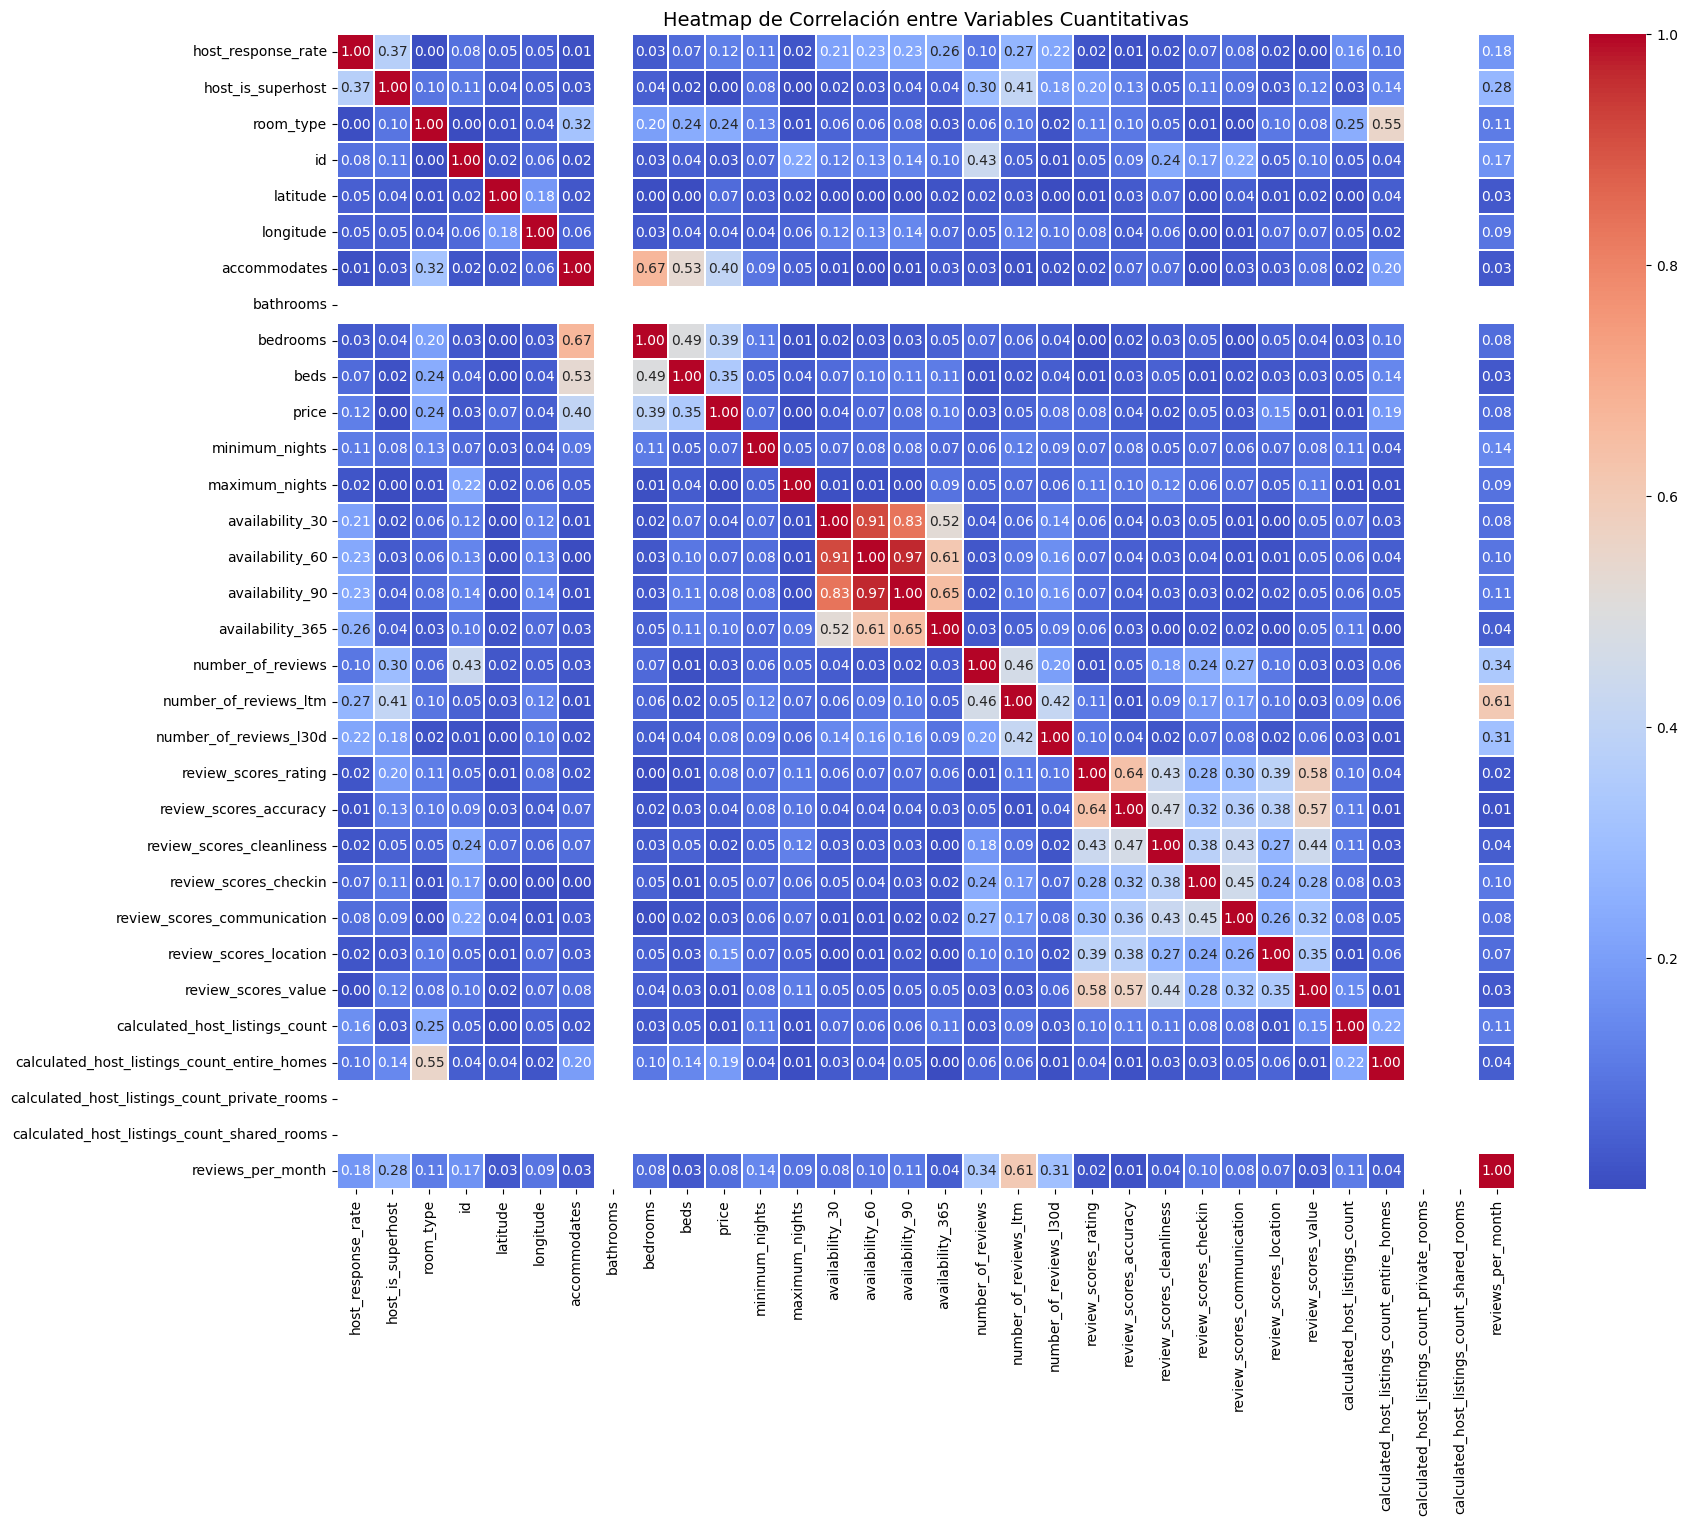

In [1352]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

**Graficas**

<Axes: xlabel='number_of_reviews', ylabel='id'>

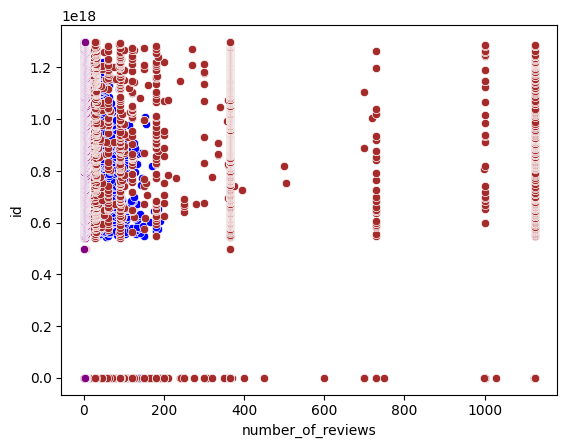

In [1353]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='id', color="blue", data=f1)
sns.scatterplot(x='review_scores_cleanliness', y='id', color="red", data=f1)
sns.scatterplot(x='maximum_nights', y='id', color="brown", data=f1)
sns.scatterplot(x='review_scores_communication', y='id', color="pink", data=f1)
sns.scatterplot(x='reviews_per_month', y='id', color="purple", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

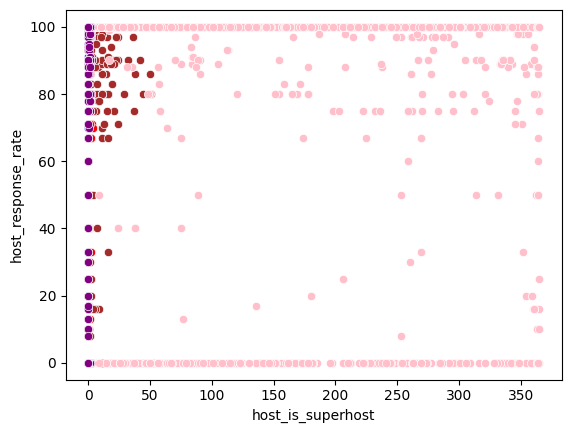

In [1354]:
from turtle import color


sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_response_rate', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_response_rate', color="brown", data=f1)
sns.scatterplot(x='availability_365', y='host_response_rate', color="pink", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_response_rate', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

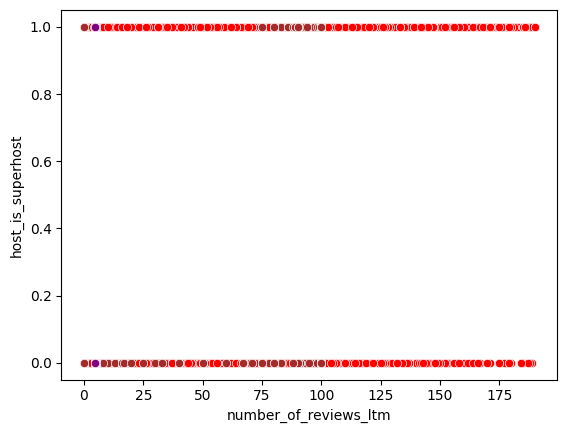

In [1355]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="red", data=f1)
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="brown", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="pink", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

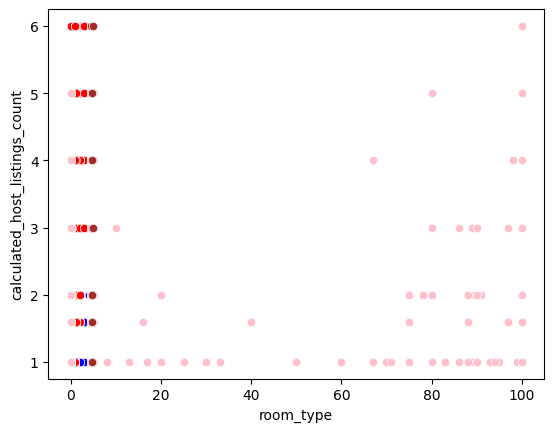

In [1356]:
from turtle import color


sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="red", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="brown", data=f1)
sns.scatterplot(x='host_response_rate', y='calculated_host_listings_count', color="pink", data=f1)


<Axes: xlabel='price', ylabel='room_type'>

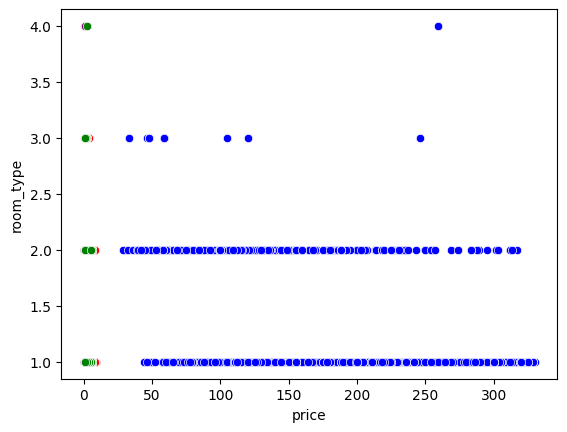

In [1357]:
from turtle import color


sns.scatterplot(x='price', y='room_type', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='room_type', color="brown", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="pink", data=f1)
sns.scatterplot(x='beds', y='room_type', color="purple", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="green", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

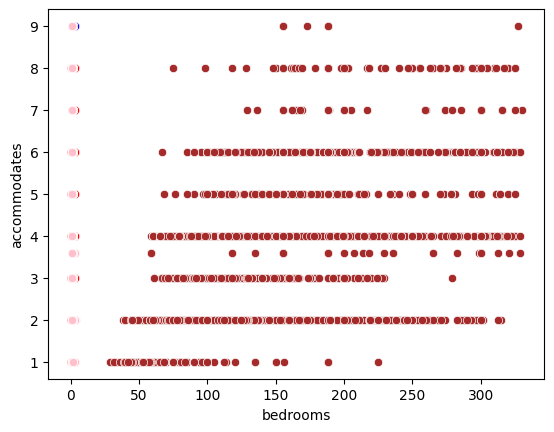

In [1358]:
from turtle import color


sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="red", data=f1)
sns.scatterplot(x='price', y='accommodates', color="brown", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="pink", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

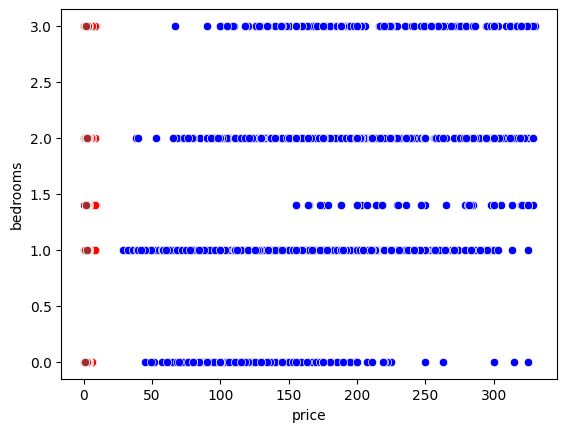

In [1359]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="brown", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

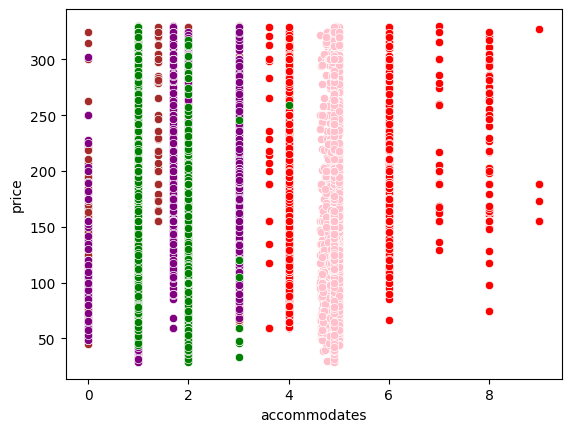

In [1360]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="pink", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='room_type', y='price', color="green", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

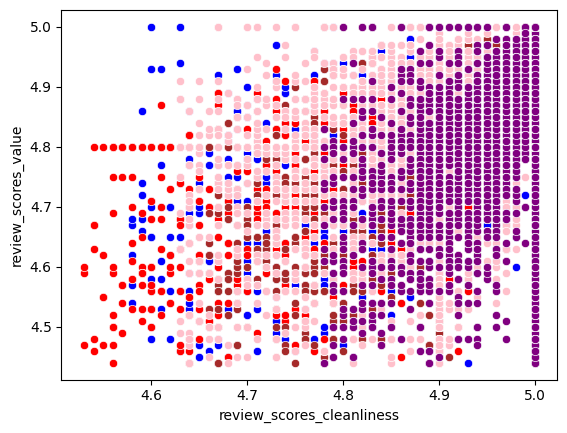

In [1361]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="red", data=f1)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="pink", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

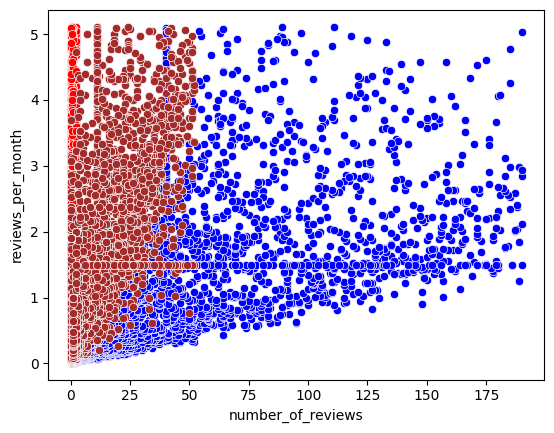

In [1362]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="brown", data=f1)

**DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES**

In [1363]:
#declaración de las variables independientes que se van a comparar con cada variable dependiente asignada 
Vars_Indep= f1[['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights', 'review_scores_communication', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'availability_365', 'number_of_reviews_l30d', 'availability_90', 'availability_60', 'availability_30']]
Vars_Indep3=f1[['number_of_reviews_ltm','number_of_reviews','host_response_rate','review_scores_rating', 'review_scores_value', 'reviews_per_month']]
Vars_Indep4=f1[['room_type','calculated_host_listings_count_entire_homes', 'review_scores_value', 'host_response_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms', 'calculated_host_listings_count_entire_homes', 'beds', 'calculated_host_listings_count']]
Vars_Indep6=f1[['bedrooms', 'beds', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates', 'beds', 'price']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'review_scores_location', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews','number_of_reviews_l30d', 'number_of_reviews_ltm']]


In [1364]:
#Declaración de variables dependientes
Var_Dep= f1['id']
Var_Dep2= f1['host_response_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [1365]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [1366]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [1367]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [1368]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights',
        'review_scores_communication', 'reviews_per_month'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-5.58024461e+15,  4.55920140e+17, -1.73081779e+14,  6.15995972e+17,
         1.38502481e+17]),
 'rank_': 5,
 'singular_': array([2.73912715e+04, 2.80923698e+03, 6.89971696e+01, 6.17591296e+00,
        2.84929457e+00]),
 'intercept_': np.float64(-4.730891396419556e+18)}

In [1369]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.3419495696815873

In [1370]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'availability_365', 'number_of_reviews_l30d', 'availability_90',
        'availability_60', 'availability_30'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([24.76697999, -0.37045905,  0.31108314,  0.05815726,  6.8295065 ,
        -0.05129072,  0.13026909,  0.19689231]),
 'rank_': 8,
 'singular_': array([8165.67224184, 2014.26846555,  797.66609562,  434.45613917,
         176.04966961,   58.49325265,   32.07973286,   28.62923119]),
 'intercept_': np.float64(46.57466038093721)}

In [1371]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.22877077189380235

In [1372]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews', 'host_response_rate',
        'review_scores_rating', 'review_scores_value', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 6,
 'coef_': array([0.00840518, 0.00169646, 0.00361695, 0.72069497, 0.12288777,
        0.01893221]),
 'rank_': 6,
 'singular_': array([2892.52395659, 2460.71213579,  679.19474432,   58.33651189,
           9.05910156,    4.47651166]),
 'intercept_': np.float64(-4.054664610623575)}

In [1373]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.28569214340902616

In [1374]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'calculated_host_listings_count_entire_homes',
        'review_scores_value', 'host_response_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.40783828,  0.83200365, -0.83861006,  0.00286067]),
 'rank_': 4,
 'singular_': array([2515.22047087,   41.40807426,   18.38739459,    7.75155547]),
 'intercept_': np.float64(2.8907378837735536)}

In [1375]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.267601103764746

In [1376]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms',
        'calculated_host_listings_count_entire_homes', 'beds',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-0.0003682 , -0.03592194,  0.01369571, -0.36087784, -0.02774871,
         0.13535149]),
 'rank_': 6,
 'singular_': array([3659.48068997,  104.65618241,   66.11896243,   36.60055339,
          35.25194415,   30.19134636]),
 'intercept_': np.float64(1.5448062935740554)}

In [1377]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.4901280212688227

In [1378]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'price', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.15047843,  0.57618791,  0.00299133, -0.65190142]),
 'rank_': 4,
 'singular_': array([3659.21793364,   48.79934792,   30.91478655,   22.51280258]),
 'intercept_': np.float64(1.2256996858879003)}

In [1379]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.533253387861545

In [1380]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.22788684, 0.19278043, 0.0014751 ]),
 'rank_': 3,
 'singular_': array([3659.42862171,  100.72583707,   33.73132356]),
 'intercept_': np.float64(0.05680748266678237)}

In [1381]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.4860341493468544

In [1382]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'review_scores_location', 'beds',
        'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  5.89192086,  14.20398868,  84.03225342,  12.12502567,
        -15.3534372 ]),
 'rank_': 5,
 'singular_': array([115.6301542 ,  35.96357517,  30.62411247,  22.23789381,
          5.39877455]),
 'intercept_': np.float64(-300.4984328334732)}

In [1383]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.22994804638085897

In [1384]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_location',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.18170446, 0.37667876, 0.39904325, 0.10748261, 0.13148076]),
 'rank_': 5,
 'singular_': array([8.99170301, 4.98420808, 4.56578264, 3.27080267, 2.8266912 ]),
 'intercept_': np.float64(-1.0537922669260409)}

In [1385]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.43294387127861145

In [1386]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_l30d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00206564, 0.13358444, 0.05044407]),
 'rank_': 3,
 'singular_': array([2839.08746026,  703.22362591,   32.46944438]),
 'intercept_': np.float64(0.8747085812568751)}

In [1387]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.379065343919176

In [1388]:
#Predecimos los valores a partir de las variables independientes 
y_pred= model.predict(X=Vars_Indep)
y_pred

array([ 8.86651426e+17, -3.56713477e+17,  2.41556776e+17, ...,
        8.90632307e+17,  8.28669030e+17,  8.86997590e+17], shape=(3967,))

In [1389]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([45.87078819, 91.29067042, 63.65222367, ..., 70.34596953,
       56.93116872, 53.96483774], shape=(3967,))

In [1390]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([0.03050376, 0.79352707, 0.20281226, ..., 0.03050376, 0.03050376,
       0.03050376], shape=(3967,))

In [1391]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([1.68108613, 2.26525241, 1.02139049, ..., 1.1052515 , 1.93725515,
       1.1052515 ], shape=(3967,))

In [1392]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([1.53302799, 0.97117001, 1.10976765, ..., 1.09023072, 0.81915915,
       1.03702548], shape=(3967,))

In [1393]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([2.78861747, 2.24776005, 4.62539765, ..., 4.49228331, 3.60055523,
       4.924531  ], shape=(3967,))

In [1394]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([0.9483116 , 0.77072373, 1.42104894, ..., 1.58329382, 1.71089   ,
       1.79644582], shape=(3967,))

In [1395]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([124.8986954 , 125.25529226, 174.64318835, ..., 172.13188386,
       157.92789518, 172.13188386], shape=(3967,))

In [1396]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.80216855, 4.78795322, 4.84019892, ..., 4.80216855, 4.80216855,
       4.80216855], shape=(3967,))

In [1397]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([0.87470858, 1.88663952, 1.00690923, ..., 0.87470858, 0.87470858,
       0.87470858], shape=(3967,))

In [1398]:
#Insertamos la columna de predicciones en el DataFrame
f1.insert(0, 'Pred_id', y_pred)
f1.insert(1, 'Pred_hrr', y_pred2)
f1.insert(2, 'Pred_his', y_pred3)
f1.insert(3, 'Pred_chl', y_pred4)
f1.insert(4, 'Pred_room', y_pred5)
f1.insert(5, 'Pred_accommodates', y_pred6)
f1.insert(6, 'Pred_bedrooms', y_pred7)
f1.insert(7, 'Pred_price', y_pred8)
f1.insert(8, 'Pred_rsv', y_pred9)
f1.insert(9, 'Pred_rpm', y_pred10)
f1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,8.866514e+17,45.870788,0.030504,1.681086,1.533028,2.788617,0.948312,124.898695,4.802169,0.874709,...,5.00,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90
1,-3.567135e+17,91.290670,0.793527,2.265252,0.971170,2.247760,0.770724,125.255292,4.787953,1.886640,...,4.87,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90
2,2.415568e+17,63.652224,0.202812,1.021390,1.109768,4.625398,1.421049,174.643188,4.840199,1.006909,...,4.98,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43
3,8.617082e+16,76.790262,0.043972,1.869029,1.669873,3.970505,1.875348,162.670368,4.600880,0.982122,...,4.65,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32
4,-3.387586e+17,73.029948,0.518725,1.353346,0.998186,5.007149,2.201608,194.360106,4.698814,1.383042,...,4.78,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,8.286690e+17,70.152524,0.392199,1.391318,1.068250,3.409110,1.616484,157.927895,4.802169,0.874709,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3963,8.286690e+17,56.263113,0.030504,1.937255,0.819159,3.600555,1.710890,157.927895,4.802169,0.874709,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90
3964,8.906323e+17,70.345970,0.030504,1.105251,1.090231,4.492283,1.583294,172.131884,4.802169,0.874709,...,5.00,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90
3965,8.286690e+17,56.931169,0.030504,1.937255,0.819159,3.600555,1.710890,157.927895,4.802169,0.874709,...,5.00,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90


**GRÁFICAS PREDICCIONES**

<Axes: xlabel='number_of_reviews', ylabel='id'>

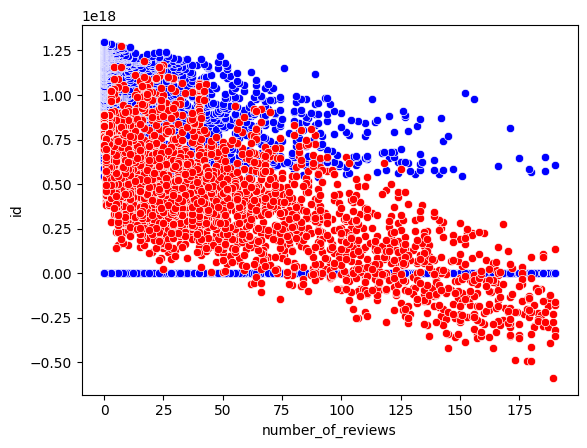

In [1399]:
#Visualizamos la gráfica comparativa entre el id con number of reviews y el predicido

sns.scatterplot(x='number_of_reviews', y='id', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='Pred_id', color="red", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

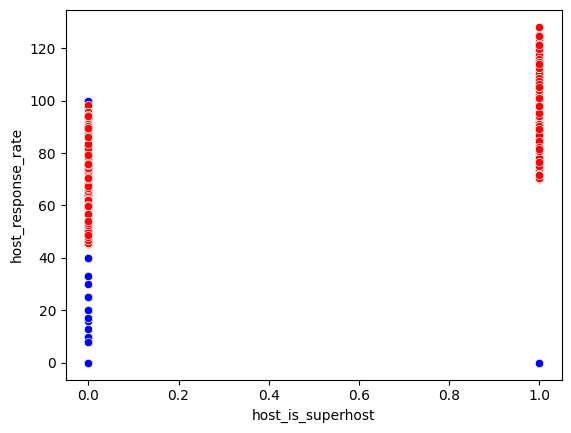

In [1400]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_hrr', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

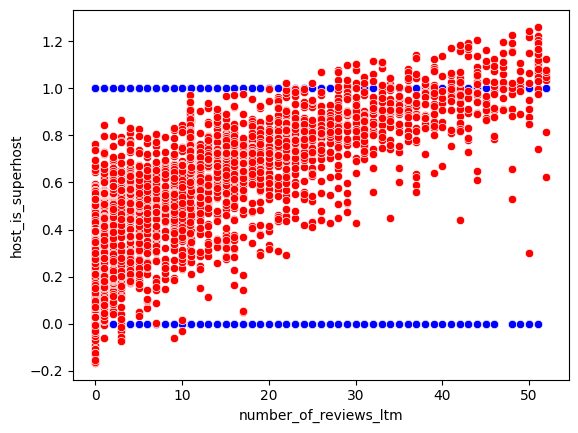

In [1401]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_his', color="red", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

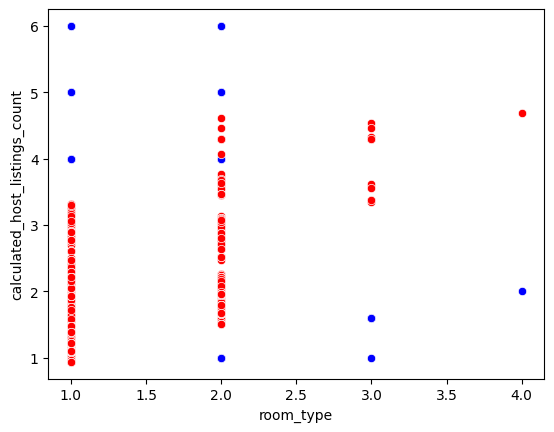

In [1402]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='room_type', y='Pred_chl', color="red", data=f1)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='room_type'>

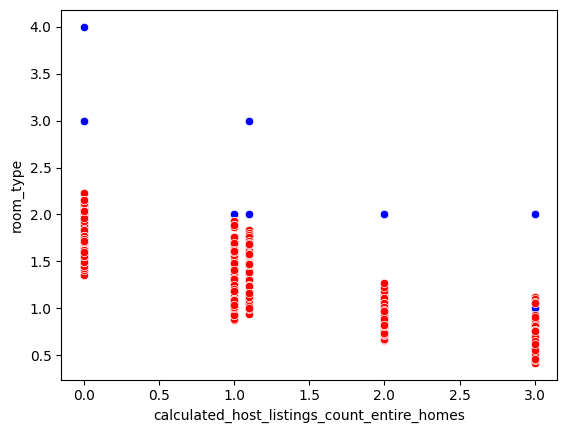

In [1403]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_room', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

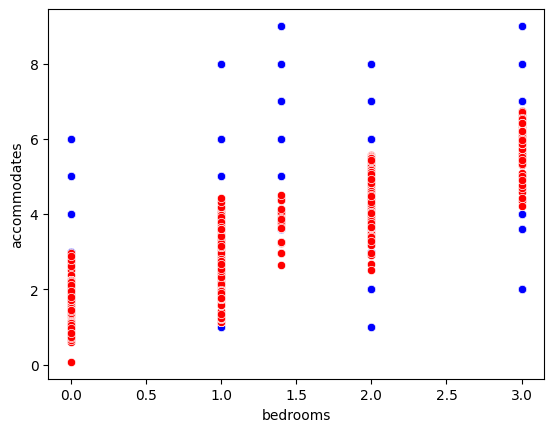

In [1404]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_accommodates', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

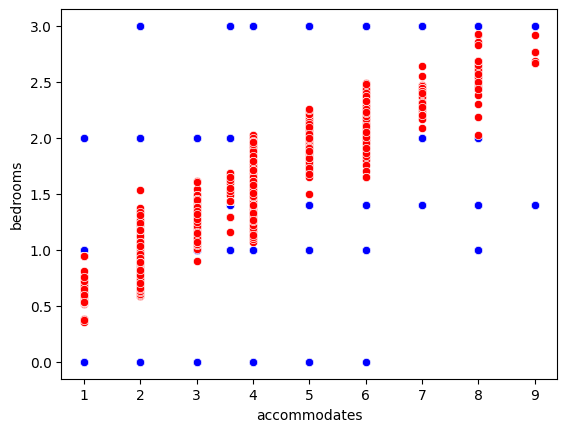

In [1405]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_bedrooms', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

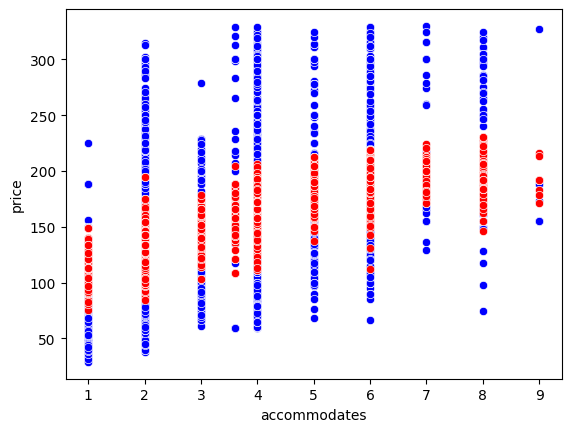

In [1406]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='price', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_price', color="red", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

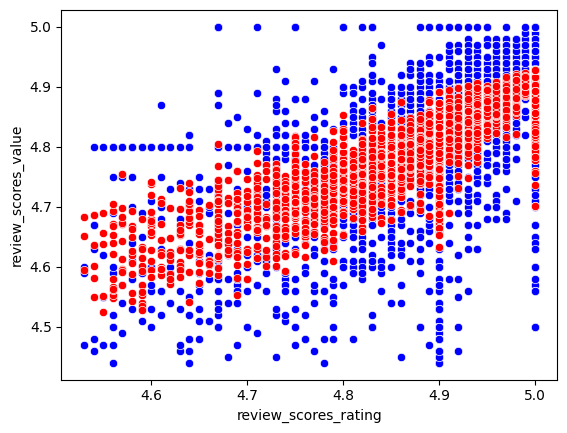

In [1407]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_rsv', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

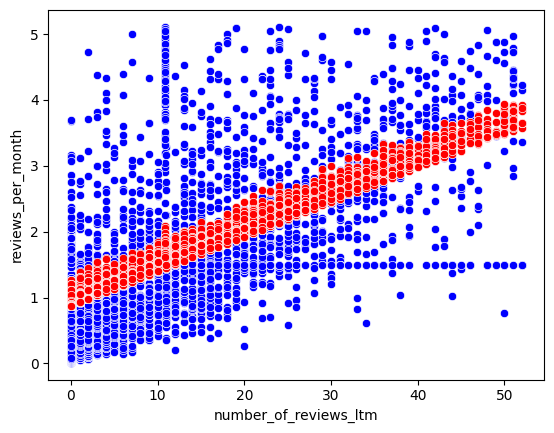

In [1408]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rpm', color="red", data=f1)

**DETERMINAMOS COEFICIENTES DE DETERMINACIÓN**

In [1409]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.3419495696815873

In [1410]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.22877077189380235

In [1411]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.28569214340902616

In [1412]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.267601103764746

In [1413]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.4901280212688227

In [1414]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.533253387861545

In [1415]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.4860341493468544

In [1416]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.22994804638085897

In [1417]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.43294387127861145

In [1418]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.379065343919176

**COEFICIENTES DE CORRELACION**

In [1419]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.58476454208646)

In [1420]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.47829987653542455)

In [1421]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.5345017711935351)

In [1422]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.5173017531042651)

In [1423]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.700091437791395)

In [1424]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7302420063660711)

In [1425]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.6971614944522212)

In [1426]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.47952898387986825)

In [1427]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.6579847044412289)

In [1428]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.6156828273706975)

In [1430]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Pred_id                                       3967 non-null   float64
 1   Pred_hrr                                      3967 non-null   float64
 2   Pred_his                                      3967 non-null   float64
 3   Pred_chl                                      3967 non-null   float64
 4   Pred_room                                     3967 non-null   float64
 5   Pred_accommodates                             3967 non-null   float64
 6   Pred_bedrooms                                 3967 non-null   float64
 7   Pred_price                                    3967 non-null   float64
 8   Pred_rsv                                      3967 non-null   float64
 9   Pred_rpm                                      3967 non-null   f

In [1432]:
f2=f1.iloc[ :  , [0,1,2,3,4,5,6,7,8,9,18,19,24,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59] ]

In [1433]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,-0.063488,-0.175087,-0.084941,0.006809,-0.006100,-0.029799,0.019779,0.259487,-0.155175,...,0.411610,0.277616,0.381263,0.129289,0.180027,-0.063291,-0.036572,NaN,NaN,0.284821
Pred_hrr,-0.063488,1.000000,0.646169,0.123386,-0.040693,-0.068967,-0.055648,-0.047510,0.084020,0.593572,...,0.015726,-0.138100,-0.117404,-0.002542,0.063308,0.053005,0.100871,NaN,NaN,0.374547
Pred_his,-0.175087,0.646169,1.000000,0.110019,-0.082644,-0.054376,-0.041229,-0.016349,0.259398,0.787621,...,0.053994,-0.090363,-0.088532,0.042057,0.220707,-0.002995,0.110340,NaN,NaN,0.517524
Pred_chl,-0.084941,0.123386,0.110019,1.000000,-0.051901,-0.204662,-0.124182,-0.238846,-0.223032,0.018958,...,-0.165803,-0.110403,-0.125504,-0.119840,-0.282099,0.517302,0.430701,NaN,NaN,-0.034890
Pred_room,0.006809,-0.040693,-0.082644,-0.051901,1.000000,-0.480526,-0.487500,-0.534516,-0.075281,-0.089382,...,-0.016912,-0.017225,0.004086,-0.073029,-0.051396,0.350220,-0.791486,NaN,NaN,-0.084063
Pred_accommodates,-0.006100,-0.068967,-0.054376,-0.204662,-0.480526,1.000000,0.827978,0.928067,0.018453,-0.040087,...,-0.023907,0.037683,-0.005651,0.081162,-0.024396,-0.080143,0.245855,NaN,NaN,-0.049165
Pred_bedrooms,-0.029799,-0.055648,-0.041229,-0.124182,-0.487500,0.827978,1.000000,0.897610,-0.032476,-0.026732,...,-0.065802,0.009022,-0.024266,0.057129,-0.069023,-0.024751,0.216125,NaN,NaN,-0.041945
Pred_price,0.019779,-0.047510,-0.016349,-0.238846,-0.534516,0.928067,0.897610,1.000000,0.131110,-0.042755,...,0.027639,0.080576,0.049105,0.318686,0.052802,-0.085112,0.279195,NaN,NaN,-0.043745
Pred_rsv,0.259487,0.084020,0.259398,-0.223032,-0.075281,0.018453,-0.032476,0.131110,1.000000,0.003962,...,0.670953,0.405593,0.493102,0.525094,0.657985,-0.118764,0.022781,NaN,NaN,-0.011879
Pred_rpm,-0.155175,0.593572,0.787621,0.018958,-0.089382,-0.040087,-0.026732,-0.042755,0.003962,1.000000,...,-0.100916,-0.193560,-0.192902,-0.101062,0.025271,-0.085979,0.060460,NaN,NaN,0.615683


In [1434]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,0.063488,0.175087,0.084941,0.006809,0.006100,0.029799,0.019779,0.259487,0.155175,...,0.411610,0.277616,0.381263,0.129289,0.180027,0.063291,0.036572,NaN,NaN,0.284821
Pred_hrr,0.063488,1.000000,0.646169,0.123386,0.040693,0.068967,0.055648,0.047510,0.084020,0.593572,...,0.015726,0.138100,0.117404,0.002542,0.063308,0.053005,0.100871,NaN,NaN,0.374547
Pred_his,0.175087,0.646169,1.000000,0.110019,0.082644,0.054376,0.041229,0.016349,0.259398,0.787621,...,0.053994,0.090363,0.088532,0.042057,0.220707,0.002995,0.110340,NaN,NaN,0.517524
Pred_chl,0.084941,0.123386,0.110019,1.000000,0.051901,0.204662,0.124182,0.238846,0.223032,0.018958,...,0.165803,0.110403,0.125504,0.119840,0.282099,0.517302,0.430701,NaN,NaN,0.034890
Pred_room,0.006809,0.040693,0.082644,0.051901,1.000000,0.480526,0.487500,0.534516,0.075281,0.089382,...,0.016912,0.017225,0.004086,0.073029,0.051396,0.350220,0.791486,NaN,NaN,0.084063
Pred_accommodates,0.006100,0.068967,0.054376,0.204662,0.480526,1.000000,0.827978,0.928067,0.018453,0.040087,...,0.023907,0.037683,0.005651,0.081162,0.024396,0.080143,0.245855,NaN,NaN,0.049165
Pred_bedrooms,0.029799,0.055648,0.041229,0.124182,0.487500,0.827978,1.000000,0.897610,0.032476,0.026732,...,0.065802,0.009022,0.024266,0.057129,0.069023,0.024751,0.216125,NaN,NaN,0.041945
Pred_price,0.019779,0.047510,0.016349,0.238846,0.534516,0.928067,0.897610,1.000000,0.131110,0.042755,...,0.027639,0.080576,0.049105,0.318686,0.052802,0.085112,0.279195,NaN,NaN,0.043745
Pred_rsv,0.259487,0.084020,0.259398,0.223032,0.075281,0.018453,0.032476,0.131110,1.000000,0.003962,...,0.670953,0.405593,0.493102,0.525094,0.657985,0.118764,0.022781,NaN,NaN,0.011879
Pred_rpm,0.155175,0.593572,0.787621,0.018958,0.089382,0.040087,0.026732,0.042755,0.003962,1.000000,...,0.100916,0.193560,0.192902,0.101062,0.025271,0.085979,0.060460,NaN,NaN,0.615683


<Axes: >

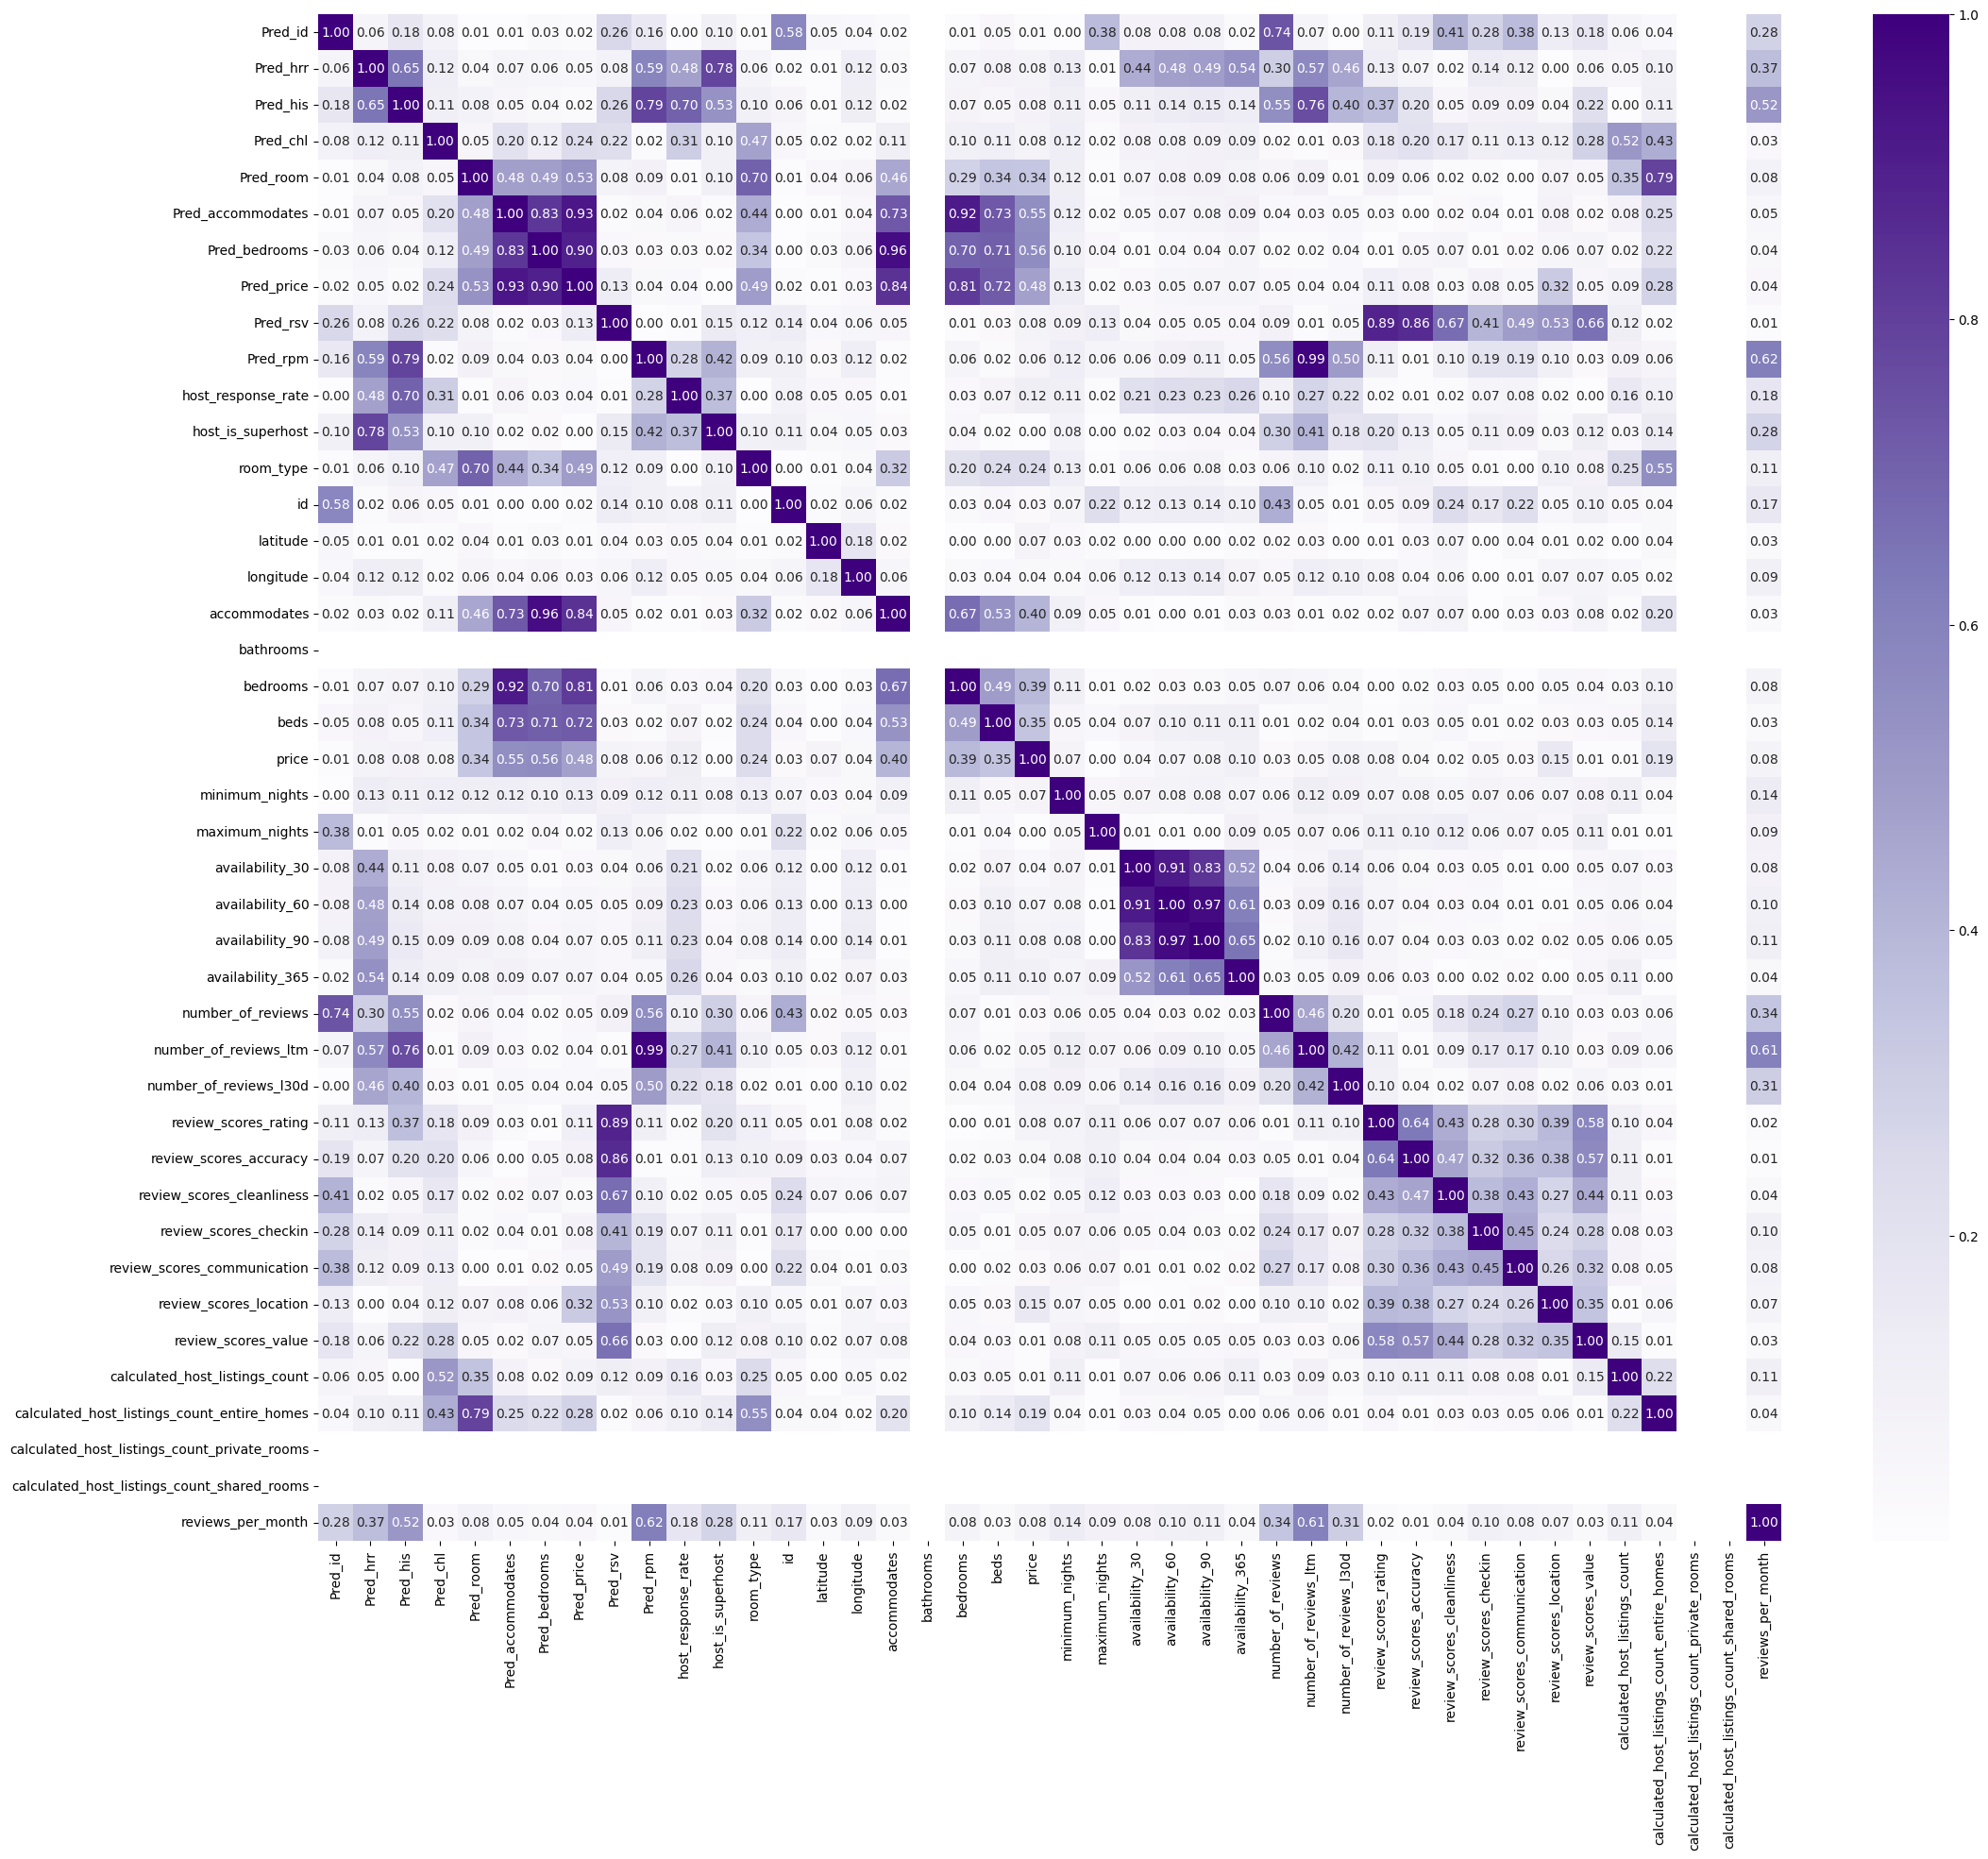

In [1437]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(25,21))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap